In [1]:
import os, sys, torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../../modules'))
sys.path.append(os.path.abspath('../../modules/celeba_male'))
import vae_train as vt
import vae_ortho as vo
import vae_surgery as vs
import vae_os as vos
import vae_ascent as va
import vae_ifb as vf
import vae_ad as vad
import classifier as cl
import batch as bt
import utility as ut
import datapipe
import vae_viz as viz
from vae import VAE
import vae_loss as vl


device = ut.get_device()
root = '../../data/CelebA/CelebA-Experiments'
celeba_folder = '../../data/CelebA'
params = {
    "model": f"{celeba_folder}/vae/vae_200.pth",
    "latent_dim": 512,
    "num_steps": 50,
    "batch_size": 128,
    "log_interval": 1,
    "collect_interval": "epoch",
    "save_steps": "epoch",
    "all_classes": [0, 1],
    "forget_class": 1,
    "classifier_path": f"{celeba_folder}/cnn/cnn_10.pth",
    "kl_weight": 1,
    "total_duration": None,
    "data_path": f'{celeba_folder}/dataset',
    "max_data": None
}

In [2]:
path_a = f'{celeba_folder}/vae/vae_200.pth'
path_b = f'{root}/vae-o/expr-0/checkpoints/vae_epoch_1.pth'
model_a = vt.init_model(path_a, 512, 'mps')
model_b = vt.init_model(path_b, 512, 'mps')
cls = cl.get_classifier('../../data/CelebA/cnn/cnn_10.pth', 'mps')
z_e = cl.find_target_latent_direction(model_a, cls, num_samples=1000)
z = torch.randn(100, 512).to(device)
new_img = model_a.decode(z)
old_img = model_b.decode(z)

/Users/pman0581/miniconda3/envs/metal/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [3]:
vl.L_unlearn(new_img, old_img, +z_e.unsqueeze(0).repeat(len(z), 1), z_e)

tensor([239.2474, 242.8363, 257.0974, 231.1120, 244.7522, 246.4736, 188.3728,
        205.0383, 188.2545, 281.3994, 317.9876, 251.6288, 205.2794, 184.1322,
        189.0720, 306.1611, 212.6328, 175.9421, 189.4288, 244.9467, 231.9953,
        260.1749, 198.1206, 276.3755, 212.9164, 287.0137, 237.4988, 170.1143,
        241.3744, 170.0194, 145.4161, 248.6858, 284.6700, 263.3470, 327.8853,
        179.1883, 294.6942, 235.6725, 267.3060, 161.4491, 301.9959, 314.3909,
        290.0132, 282.2043, 229.5941, 234.0824, 185.1458, 270.9885, 209.5454,
        253.2010, 197.6371, 279.1229, 182.4997, 238.6707, 340.9024, 198.7717,
        279.3935, 201.7273, 146.2384, 296.3453, 258.4976, 230.2592, 320.5620,
        267.6796, 164.8222, 166.6538, 342.7188, 175.6521, 275.0486, 213.7874,
        415.5223, 241.3218, 298.2507, 239.3025, 164.7796, 196.7035, 134.1311,
        206.0743, 210.6467, 250.8201, 244.6414, 202.9771, 146.0380, 323.5027,
        165.4824, 324.8878, 295.4766, 301.6250, 371.1226, 222.06

In [4]:
vl.L_percep(new_img, old_img, +z_e.unsqueeze(0).repeat(len(z), 1), z_e)

tensor([0.0108, 0.0119, 0.0159, 0.0141, 0.0125, 0.0093, 0.0080, 0.0057, 0.0102,
        0.0137, 0.0111, 0.0196, 0.0078, 0.0085, 0.0087, 0.0400, 0.0181, 0.0057,
        0.0082, 0.0121, 0.0162, 0.0242, 0.0057, 0.0322, 0.0074, 0.0166, 0.0115,
        0.0079, 0.0148, 0.0058, 0.0122, 0.0070, 0.0111, 0.0226, 0.0223, 0.0123,
        0.0180, 0.0081, 0.0147, 0.0037, 0.0164, 0.0123, 0.0162, 0.0171, 0.0095,
        0.0241, 0.0102, 0.0235, 0.0107, 0.0129, 0.0090, 0.0077, 0.0109, 0.0085,
        0.0206, 0.0111, 0.0084, 0.0101, 0.0036, 0.0276, 0.0113, 0.0063, 0.0186,
        0.0143, 0.0047, 0.0083, 0.0200, 0.0070, 0.0163, 0.0083, 0.0284, 0.0095,
        0.0230, 0.0128, 0.0044, 0.0078, 0.0039, 0.0064, 0.0078, 0.0145, 0.0154,
        0.0109, 0.0080, 0.0186, 0.0042, 0.0164, 0.0180, 0.0112, 0.0242, 0.0119,
        0.0169, 0.0060, 0.0133, 0.0328, 0.0071, 0.0078, 0.0105, 0.0266, 0.0105,
        0.0076], device='mps:0', grad_fn=<MulBackward0>)

Epochs: 100%|█████████████████████████████████████| 1/1 [00:07<00:00,  7.31s/it]


Time taken by summarize_training is 0.4870 seconds
Time taken by run is 19.0289 seconds


AssertionError: Torch not compiled with CUDA enabled

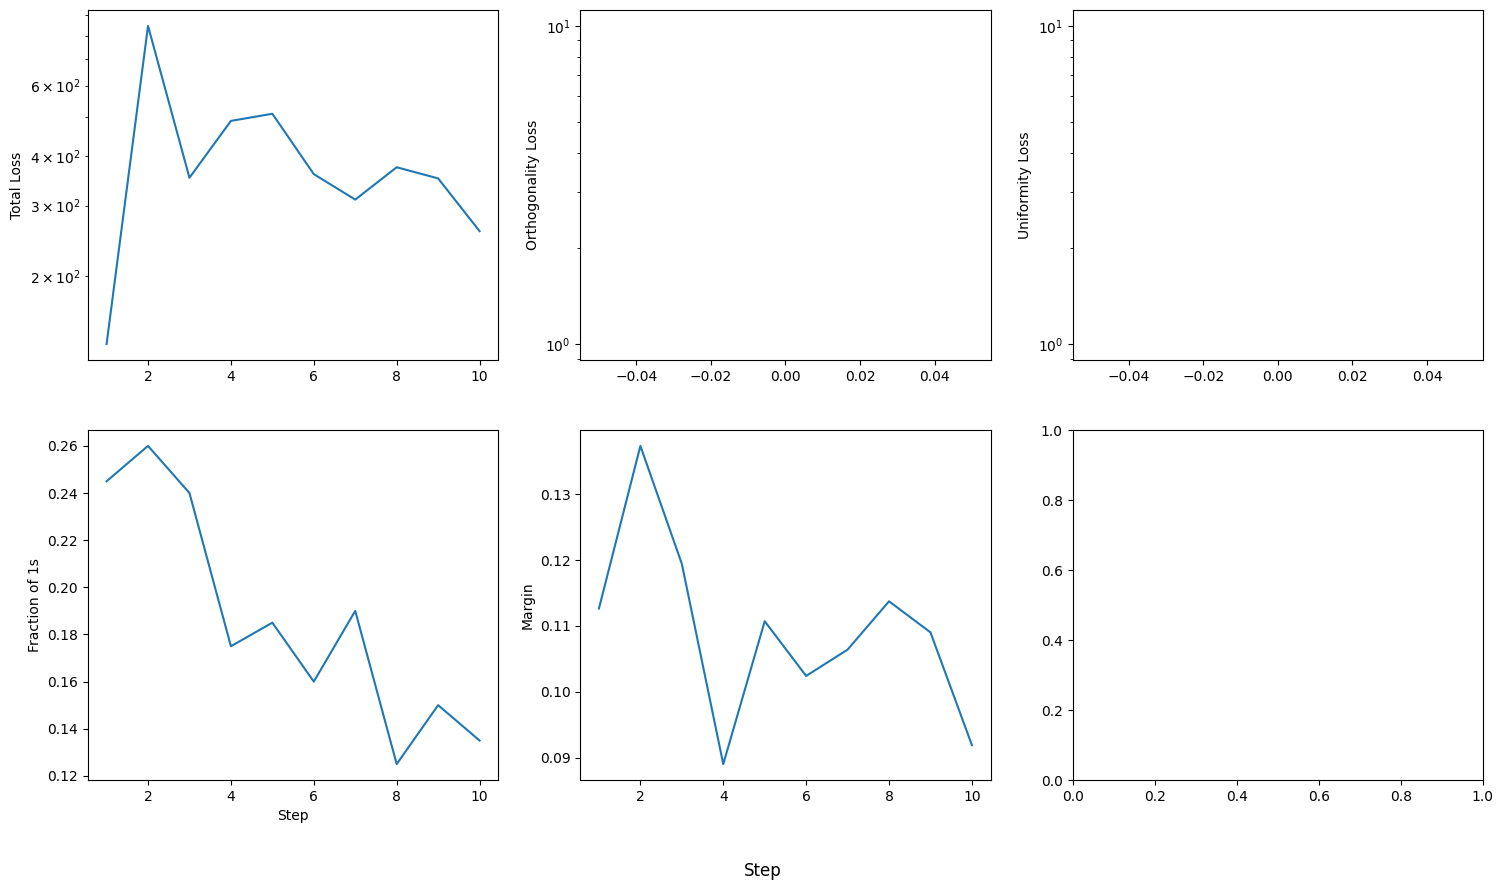

In [4]:
train_kwargs = {"model": "../../data/CelebA/vae/vae_200.pth", "latent_dim": 512,\
                "num_steps": 10, "batch_size": 200, "log_interval": 1, "collect_interval": "epoch",\
                "all_classes": [0, 1], "forget_class": 1,\
                "classifier_path": '../../data/CelebA/cnn/cnn_10.pth',\
                "kl_weight": 1, "uniformity_weight": 1e3,\
                'data_path': '../../data/CelebA/dataset', "max_data": 2000,\
                "total_duration": None}

suffix = 'ifb'
train_kwargs["folder"] = f"../../data/CelebA/test/vae_{suffix}"

be = bt.BatchExperiment(vf.train, train_kwargs, 1)
be.run()

be.summarize()